In [ ]:
#Using the glove-Python library from gensim

In [1]:
from gensim.models import word2vec
import itertools
from gensim.models.word2vec import Text8Corpus
from glove import Corpus, Glove
import os
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\data\proper_data\skill_data_1million.csv")
df.head(10)

,skill
0,"Product Management,RPM,Progress 4GL,IP,CAMEL,P..."
1,"User Experience,Interaction Design,3D renderin..."
2,"Social Media,Excel,PowerPoint,Microsoft Word,W..."
3,"Government,Research,Economic History,planning,..."
4,"continuous improvement,data governance,quality..."
5,Real Estate
6,"Digital Photograhy,Graphic Design,Planning,Exc..."
7,"Project Management,PowerPoint,werving,Microsof..."
8,"Video Editing,Avid,Editorial,Newspaper,Magazin..."
9,"Direct Marketing,Packaging,Brand Management,So..."


In [3]:
len(df)

572130

In [5]:
sentences = list(itertools.islice(Text8Corpus(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\data\proper_data\skill_data_1million.csv"),None))

In [6]:
corpus = Corpus()
corpus.fit(sentences, window = 10)
glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [7]:
manasa = glove.add_dictionary(corpus.dictionary)
manasa

In [8]:
manasa

In [14]:
glove.most_similar('productdevelopment',number=10)

[('Skills,Fashion,Illustrator,Concept', 0.7013148007370188),
 ('Drilling,Electrical,Factory,Project', 0.6937522105585441),
 ('Leadership,Node.js,Microsoft', 0.6924896087641655),
 ('entries,Analysis,Accounting,income', 0.6921157751887334),
 ('Planning,Gegevensbescherming,Organisatiepsychologie,Event',
  0.6913963765859295),
 ('Development,Management,Media,staff', 0.689262388859176),
 ('Consulting,Recruiting,Events,Humor,sales', 0.6891614774517238),
 ('"GIS,SLD,Geoweb', 0.6838086418350712),
 ('Rights,Nonprofits,Politics,Legal', 0.6836569747736404)]

In [101]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file=model_file, word2vec_output_file=(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\data\glovemodel.txt") 

(223613, 5)

In [3]:
from gensim.models.keyedvectors import KeyedVectors
filename = r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\data\glovemodel.txt"
glove_model = KeyedVectors.load_word2vec_format(filename)

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
#Using pre trained Glove model

In [12]:
import gensim
import gensim.downloader as api
model = api.load("glove-twitter-200")

In [14]:
words = pd.read_csv(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\data\preprocessed_data.csv")
words

,skills
0,emdr
1,io
2,productdevelopment
3,businessdevelopment
4,automatisering
...,...
633591,employeebenefit
633592,administration
633593,managementconsult
633594,changemanagement


In [7]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\GloVe\glove.6B.100d.txt\glove.6B.100d.txt"
word2vec_output_file = r'C:\Users\manas\Documents\Master Thesis\code\Manasa2022\data\glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

C:\Users\manas\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  after removing the cwd from sys.path.


(400000, 100)

In [8]:
import gensim
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = r'C:\Users\manas\Documents\Master Thesis\code\Manasa2022\data\glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [12]:
model.most_similar('product')

[('products', 0.8239001631736755),
 ('sales', 0.7630948424339294),
 ('distribution', 0.7073397040367126),
 ('brand', 0.6989933848381042),
 ('marketing', 0.6982887387275696),
 ('quality', 0.6960445046424866),
 ('production', 0.6899324059486389),
 ('consumer', 0.6858088970184326),
 ('packaging', 0.6806288957595825),
 ('industry', 0.6759723424911499)]

In [18]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model[word] for word in words['skills'] if word in model.key_to_index]
#vector_list
words_filtered = [word for word in words['skills'] if word in model.key_to_index]
words_filtered
word_vec_zip = zip(words_filtered, vector_list)
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
emdr,0.31485,0.279650,-0.638640,-0.038266,-0.143530,-0.408850,0.337850,0.050751,0.527900,-0.227420,...,0.386890,-0.652350,-0.189520,-0.023393,0.584580,0.021589,0.061315,-0.172940,-0.284030,-0.267660
io,-0.21172,-0.064471,0.428820,0.102760,-0.109530,0.460950,0.626750,0.156970,0.520730,0.688840,...,-0.396840,1.168900,0.189960,0.122560,0.905780,0.258180,-0.595040,-0.610550,-0.299180,-0.047717
research,-0.16376,0.523550,-0.739500,0.145110,0.516740,-1.282100,0.596240,-0.221150,-0.637490,0.156000,...,0.335930,-0.462140,0.737280,-0.088564,0.148120,0.904070,-0.297130,-0.882490,0.741310,0.506040
communication,0.21062,-0.314130,-0.255480,0.753740,0.287270,-0.589320,0.179530,-0.621820,0.522990,0.219310,...,0.510460,0.454310,0.133750,0.525540,0.207060,0.215720,-0.119510,-0.735170,0.314370,0.564400
newmedia,0.31468,-0.535260,0.043610,-0.357820,-0.194340,0.092803,0.098547,-0.190940,0.093594,0.752040,...,0.256870,0.792980,0.289160,-0.738340,-0.232690,0.101660,0.491170,-0.013946,-0.308560,-0.126170
illustrator,-0.40348,0.115640,-1.002400,0.458880,0.924430,-0.093687,0.190360,-1.359600,0.160800,0.312440,...,0.274830,0.293560,1.661700,-0.467990,0.076028,0.292370,-0.529800,-0.455290,0.001499,-0.530650
photoshop,-0.61811,0.288150,-0.426230,0.627380,0.082361,0.252100,0.216430,-0.175940,1.038600,0.860150,...,-0.161520,0.242940,0.273790,0.565120,0.740410,-1.185600,-0.220610,-0.292820,0.379730,0.221140
spss,0.14820,-0.446780,0.752330,0.127500,0.499090,-0.484730,0.326750,-0.553300,0.446780,-0.437680,...,0.129670,0.146160,-0.078351,-0.169770,0.151420,-0.531900,0.266000,0.621310,-0.281350,-0.474490
seo,-0.48669,0.135300,-0.338770,-0.956530,-0.699900,-0.068057,-0.046606,0.115790,0.604170,-0.038299,...,0.052044,0.226210,-0.022795,0.359110,0.414890,0.122490,-0.920860,-0.825830,-0.003693,-0.326010
wordpress,-0.24866,0.074413,0.083093,-0.413370,1.094700,-0.113480,-0.139660,-0.707170,0.783670,0.648910,...,0.227740,-0.065758,0.011013,-0.210050,0.721670,-0.399110,-0.545620,-0.203720,0.642470,0.744060


In [19]:
len(df)

6265

In [20]:
from sklearn.manifold import TSNE
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import seaborn as sns

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:6265])

C:\Users\manas\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


C:\Users\manas\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


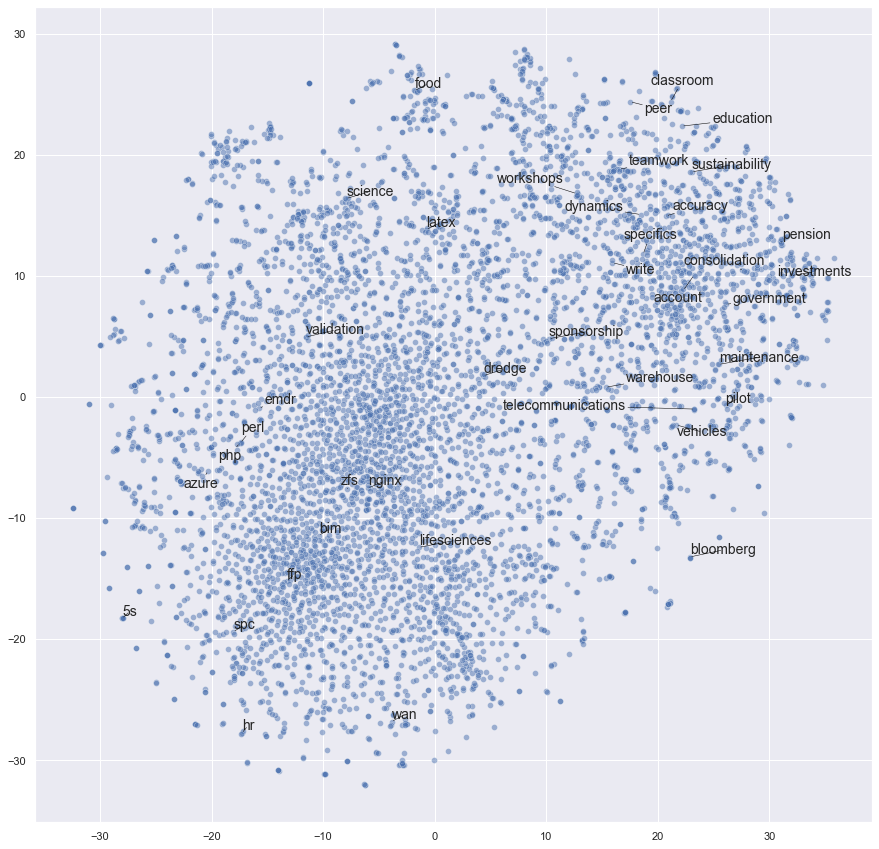

In [26]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (15, 15))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()